In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

req = requests.get('https://www.basketball-reference.com/leagues/NBA_2018_totals.html')
if req.status_code == 200:
    print('Requisição bem sucedida!')
    content = req.content

soup = BeautifulSoup(content, 'html.parser')

table = soup.find(name='table')

table_str = str(table)
df = pd.read_html(table_str)[0]

table = soup.find(name='table', attrs={'id':'confs_standings_W'})

Requisição bem sucedida!


In [3]:
def scrape_stats(base_url, year_start, year_end):
    years = range(year_start,year_end+1,1)

    final_df = pd.DataFrame()

    for year in years:
        print('Extraindo ano {}'.format(year))
        req_url = base_url.format(year)
        req = requests.get(req_url)
        soup = BeautifulSoup(req.content, 'html.parser')
        table = soup.find('table', {'id':'totals_stats'})
        df = pd.read_html(str(table))[0]
        df['Year'] = year
        final_df = final_df.append(df)
    return final_df
url = 'https://www.basketball-reference.com/leagues/NBA_{}_totals.html'
df = scrape_stats(url, 2013, 2019)

Extraindo ano 2013
Extraindo ano 2014
Extraindo ano 2015
Extraindo ano 2016
Extraindo ano 2017
Extraindo ano 2018
Extraindo ano 2019


In [4]:
df

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Quincy Acy,PF,22,TOR,29,0,342,42,75,...,30,47,77,11,13,15,17,53,116,2013
1,2,Jeff Adrien,PF,26,CHA,52,5,713,72,168,...,68,128,196,36,18,27,32,80,209,2013
2,3,Arron Afflalo,SF,27,ORL,64,64,2307,397,905,...,29,210,239,206,40,11,138,137,1057,2013
3,4,Josh Akognon,PG,26,DAL,3,0,9,2,4,...,0,1,1,1,0,0,0,3,5,2013
4,5,Cole Aldrich,C,24,TOT,45,0,388,44,80,...,30,90,120,9,5,23,23,60,100,2013
5,5,Cole Aldrich,C,24,HOU,30,0,213,23,43,...,12,45,57,6,3,9,14,41,50,2013
6,5,Cole Aldrich,C,24,SAC,15,0,175,21,37,...,18,45,63,3,2,14,9,19,50,2013
7,6,LaMarcus Aldridge,PF,27,POR,74,74,2790,638,1318,...,175,495,670,192,62,91,143,187,1560,2013
8,7,Lavoy Allen,C,23,PHI,79,37,1669,206,454,...,159,236,395,73,24,55,55,180,455,2013
9,8,Ray Allen*,SG,37,MIA,79,0,2035,292,651,...,40,177,217,135,67,15,103,129,863,2013


In [6]:
drop_indexes = df[df['Rk'] == 'Rk'].index # Pega indexes onde a coluna 'Rk' possui valor 'Rk'
df.drop(drop_indexes, inplace=True) # elimina os valores dos index passados da tabela

In [24]:
numeric_cols = df.columns.drop(['Player','Pos','Tm'])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

In [25]:
sorted_df = df.sort_values(by=['3P'], axis=0, ascending=False)

sorted_df[['Player', '3P', 'Year']].head()

,Player,3P,Year
121,Stephen Curry,402,2016
124,Stephen Curry,324,2017
264,James Harden,312,2019
140,Stephen Curry,286,2015
123,Stephen Curry,272,2013


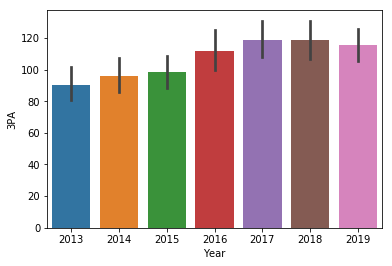

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x = df['Year'], y = df['3PA'])